In [63]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

In [64]:
df = pd.read_csv("C:/Users/nroyc/Downloads/EURUSD_Candlestick_4_Hour_ASK_05.05.2003-16.10.2021.csv")

In [65]:
df.rename(columns={"Gmt time": "time"}, inplace=True)

In [66]:
df

,time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083
...,...,...,...,...,...,...
28855,15.10.2021 01:00:00.000,1.15940,1.16120,1.15938,1.16082,5738.6300
28856,15.10.2021 05:00:00.000,1.16082,1.16189,1.15995,1.16034,13149.6600
28857,15.10.2021 09:00:00.000,1.16033,1.16124,1.15892,1.15923,14914.3300
28858,15.10.2021 13:00:00.000,1.15923,1.16103,1.15893,1.15953,20002.5300


In [67]:
df.isna().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [68]:
df = df[df['volume'] != 0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [69]:
df['RSI'] = df.ta.rsi(length=14)

In [70]:
df.head()

,time,open,high,low,close,volume,RSI
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976,NaN
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996,0.000000
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992,0.000000
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992,3.280200
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083,26.255736


In [71]:
df['RSI'].isna().sum()

np.int64(1)

In [72]:
df = df.dropna(subset=['RSI']).copy()
df.reset_index(drop=True, inplace=True)
df.head()

,time,open,high,low,close,volume,RSI
0,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996,0.000000
1,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992,0.000000
2,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992,3.280200
3,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083,26.255736
4,05.05.2003 17:00:00.000,1.12718,1.13019,1.12657,1.12804,373668.2930,29.346557


In [73]:
df1 = df[27859:28860]
fig = make_subplots(rows=2, cols=1)
fig.append_trace(go.Candlestick(x=df1.index,
                                open=df1['open'],
                                high=df1['high'],
                                low=df1['low'],
                                close=df1['close']), row=1, col=1)
fig.append_trace(go.Scatter(
    x=df1.index,
    y=df1['RSI'],
), row=2, col=1)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [74]:
def localExtrema(df, l, n):
    if l-n < 0 or l+n >= len(df):
        return 0
    plow = True
    phigh = True
    for i in range(l-n, l+n+1):
        if df.low[l] > df.low[i]:
            plow = False
        if df.high[l] < df.high[i]:
            phigh = False
    if plow and phigh:
        return 3
    elif plow:
        return 1
    elif phigh:
        return 2;
    else:
        return 0

In [75]:
def RSIExtrema(df, l, n):
    if l-n < 0 or l+n >= len(df):
        return 0
    plow = True
    phigh = True
    for i in range(l-n, l+n+1):
        if df.RSI[l] > df.RSI[i]:
            plow = False
        if df.RSI[l] < df.RSI[i]:
            phigh = False
    if plow and phigh:
        return 3
    elif plow:
        return 1
    elif phigh:
        return 2;
    else:
        return 0

In [76]:
df['extrema'] = df.apply(lambda x: localExtrema(df, x.name, 8), axis=1)
df['RSIextrema'] = df.apply(lambda x: RSIExtrema(df, x.name, 6), axis=1)

In [77]:
df

,time,open,high,low,close,volume,RSI,extrema,RSIextrema
0,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996,0.000000,0,0
1,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992,0.000000,0,0
2,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992,3.280200,0,0
3,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083,26.255736,0,0
4,05.05.2003 17:00:00.000,1.12718,1.13019,1.12657,1.12804,373668.2930,29.346557,0,0
...,...,...,...,...,...,...,...,...,...
28820,15.10.2021 01:00:00.000,1.15940,1.16120,1.15938,1.16082,5738.6300,59.946065,0,0
28821,15.10.2021 05:00:00.000,1.16082,1.16189,1.15995,1.16034,13149.6600,58.038673,0,0
28822,15.10.2021 09:00:00.000,1.16033,1.16124,1.15892,1.15923,14914.3300,53.777344,0,0
28823,15.10.2021 13:00:00.000,1.15923,1.16103,1.15893,1.15953,20002.5300,54.744468,0,0


In [78]:
def pointpos(x):
    if x['extrema'] == 1:
        return x['low']-1e-3
    elif x['extrema'] == 2:
        return x['high']+1e-3
    else:
        return np.nan

def RSIpointpos(x):
    if x['RSIextrema'] == 1:
        return x['RSI']-1
    elif x['RSIextrema'] == 2:
        return x['RSI']+1
    else:
        return np.nan

In [79]:
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)
df['RSIpointpos'] = df.apply(lambda row: RSIpointpos(row), axis=1)

In [80]:
df1 = df[27859:28860]

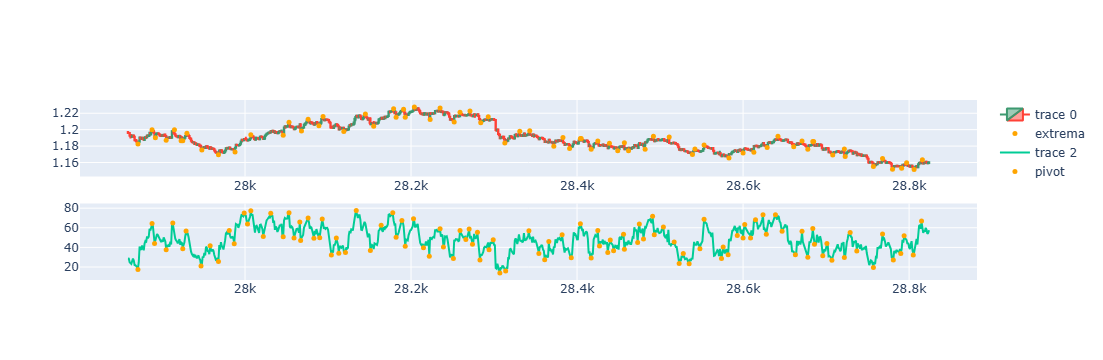

In [81]:
fig=make_subplots(rows=2, cols=1)
fig.append_trace(go.Candlestick(x=df1.index,
                 open=df1['open'],
                 high=df1['high'],
                 low=df1['low'],
                 close=df1['close']), row=1, col=1)

fig.add_scatter(x=df1.index, y=df1['pointpos'], mode="markers",
                marker=dict(size=5, color="Orange"),
                name="extrema")

fig.append_trace(go.Scatter(x=df1.index, y=df1['RSI']), row=2, col=1)
fig.add_scatter(x=df1.index, y=df1['RSIpointpos'], mode="markers",
                marker=dict(size=5, color="Orange"),
                name="pivot", row=2, col=1)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [82]:
def RSIDivDet(row, backCandles): 
    ind = int(row.name)

    maxPts = np.array([])
    minPts = np.array([])
    maxInd = np.array([])
    minInd = np.array([])

    maxPtsRSI = np.array([])
    minPtsRSI = np.array([])
    maxIndRSI = np.array([])
    minIndRSI = np.array([])

    for i in range(ind-backCandles, ind+1):
        if df.iloc[i].extrema == 1:
            minPts = np.append(minPts, df.iloc[i].low)
            minInd = np.append(minInd, i)
        if df.iloc[i].extrema == 2:
            maxPts = np.append(maxPts, df.iloc[i].high)
            maxInd = np.append(maxInd, i)
        if df.iloc[i].RSIextrema == 1:
            minPtsRSI = np.append(minPtsRSI, df.iloc[i].RSI)
            minIndRSI = np.append(minIndRSI, i)
        if df.iloc[i].RSIextrema == 2:
            maxPtsRSI = np.append(maxPtsRSI, df.iloc[i].RSI)
            maxIndRSI = np.append(maxIndRSI, i)

    if maxPts.size<2 or minPts.size<2 or maxPtsRSI.size<2 or minPtsRSI.size<2:
        return 0
    
    minSlope, minInt = np.polyfit(minInd, minPts,1)
    maxSlope, maxInt = np.polyfit(maxInd, maxPts,1)
    minSlopeRSI, minIntRSI = np.polyfit(minIndRSI, minPtsRSI,1)
    maxSlopeRSI, maxIntRSI = np.polyfit(maxIndRSI, maxPtsRSI,1)
    
    
    if minSlope > 1e-4 and maxSlope > 1e-4 and maxSlopeRSI <-0.1:
        return 1
    elif minSlope < -1e-4 and maxSlope < -1e-4 and minSlopeRSI > 0.1:
        return 2
    else:
        return 0

In [83]:
df['RSI_Div'] = df.apply(lambda row: RSIDivDet(row, 30), axis=1)

In [84]:
df

,time,open,high,low,close,volume,RSI,extrema,RSIextrema,pointpos,RSIpointpos,RSI_Div
0,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996,0.000000,0,0,NaN,NaN,0
1,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992,0.000000,0,0,NaN,NaN,0
2,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992,3.280200,0,0,NaN,NaN,0
3,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083,26.255736,0,0,NaN,NaN,0
4,05.05.2003 17:00:00.000,1.12718,1.13019,1.12657,1.12804,373668.2930,29.346557,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28820,15.10.2021 01:00:00.000,1.15940,1.16120,1.15938,1.16082,5738.6300,59.946065,0,0,NaN,NaN,0
28821,15.10.2021 05:00:00.000,1.16082,1.16189,1.15995,1.16034,13149.6600,58.038673,0,0,NaN,NaN,0
28822,15.10.2021 09:00:00.000,1.16033,1.16124,1.15892,1.15923,14914.3300,53.777344,0,0,NaN,NaN,0
28823,15.10.2021 13:00:00.000,1.15923,1.16103,1.15893,1.15953,20002.5300,54.744468,0,0,NaN,NaN,0


In [85]:
df['RSI_Div'].value_counts()

RSI_Div
0    28565
1      155
2      105
Name: count, dtype: int64

In [86]:
for i in range(len(df)-1, -1, -1):
    indicator = RSIDivDet(df.iloc[i], 30)
    if indicator == 2:
        print(i)
        break

24124


In [87]:
class BacktestConfig:
    INITIAL_CAPITAL = 10000
    POSITION_SIZE = 0.02
    STOP_LOSS_PIPS = 50
    TAKE_PROFIT_PIPS = 100
    PIP_VALUE = 0.0001
    SPREAD_PIPS = 2
    RISK_FREE_RATE = 0.02
    TRADING_DAYS_PER_YEAR = 252
    BARS_PER_DAY = 6

In [94]:
def run_backtest(df, config=BacktestConfig):
    trades = []
    equity = [config.INITIAL_CAPITAL]
    capital = config.INITIAL_CAPITAL
    position = None
    
    for i in range(len(df)):
        row = df.iloc[i]
        
        if position is not None:
            if position['type'] == 'long':
                if row['low'] <= position['sl']:
                    pnl = (position['sl'] - position['entry_price']) / config.PIP_VALUE * position['risk_amount'] / config.STOP_LOSS_PIPS
                    capital += pnl
                    trades.append({'entry_time': position['entry_time'], 'exit_time': row['time'], 'type': 'long',
                                   'entry_price': position['entry_price'], 'exit_price': position['sl'], 'pnl': pnl, 'exit_reason': 'stop_loss'})
                    position = None
                elif row['high'] >= position['tp']:
                    pnl = (position['tp'] - position['entry_price']) / config.PIP_VALUE * position['risk_amount'] / config.STOP_LOSS_PIPS
                    capital += pnl
                    trades.append({'entry_time': position['entry_time'], 'exit_time': row['time'], 'type': 'long',
                                   'entry_price': position['entry_price'], 'exit_price': position['tp'], 'pnl': pnl, 'exit_reason': 'take_profit'})
                    position = None
            elif position['type'] == 'short':
                if row['high'] >= position['sl']:
                    pnl = (position['entry_price'] - position['sl']) / config.PIP_VALUE * position['risk_amount'] / config.STOP_LOSS_PIPS
                    capital += pnl
                    trades.append({'entry_time': position['entry_time'], 'exit_time': row['time'], 'type': 'short',
                                   'entry_price': position['entry_price'], 'exit_price': position['sl'], 'pnl': pnl, 'exit_reason': 'stop_loss'})
                    position = None
                elif row['low'] <= position['tp']:
                    pnl = (position['entry_price'] - position['tp']) / config.PIP_VALUE * position['risk_amount'] / config.STOP_LOSS_PIPS
                    capital += pnl
                    trades.append({'entry_time': position['entry_time'], 'exit_time': row['time'], 'type': 'short',
                                   'entry_price': position['entry_price'], 'exit_price': position['tp'], 'pnl': pnl, 'exit_reason': 'take_profit'})
                    position = None
        
        if position is None and 'RSI_Div' in df.columns:
            signal = row['RSI_Div']
            risk_amount = config.INITIAL_CAPITAL * config.POSITION_SIZE  # Fixed risk based on initial capital
            
            if signal == 2:  # Bullish -> LONG
                entry_price = row['close'] + config.SPREAD_PIPS * config.PIP_VALUE
                position = {'type': 'long', 'entry_price': entry_price, 
                            'sl': entry_price - config.STOP_LOSS_PIPS * config.PIP_VALUE,
                            'tp': entry_price + config.TAKE_PROFIT_PIPS * config.PIP_VALUE, 
                            'risk_amount': risk_amount, 'entry_time': row['time']}
            elif signal == 1:  # Bearish -> SHORT
                entry_price = row['close'] - config.SPREAD_PIPS * config.PIP_VALUE
                position = {'type': 'short', 'entry_price': entry_price, 
                            'sl': entry_price + config.STOP_LOSS_PIPS * config.PIP_VALUE,
                            'tp': entry_price - config.TAKE_PROFIT_PIPS * config.PIP_VALUE, 
                            'risk_amount': risk_amount, 'entry_time': row['time']}
        
        equity.append(capital)
    
    if position is not None:
        last_row = df.iloc[-1]
        if position['type'] == 'long':
            pnl = (last_row['close'] - position['entry_price']) / config.PIP_VALUE * position['risk_amount'] / config.STOP_LOSS_PIPS
        else:
            pnl = (position['entry_price'] - last_row['close']) / config.PIP_VALUE * position['risk_amount'] / config.STOP_LOSS_PIPS
        capital += pnl
        trades.append({'entry_time': position['entry_time'], 'exit_time': last_row['time'], 'type': position['type'],
                       'entry_price': position['entry_price'], 'exit_price': last_row['close'], 'pnl': pnl, 'exit_reason': 'end_of_data'})
        equity[-1] = capital
    
    return pd.DataFrame(trades), pd.Series(equity)

In [89]:
def calculate_metrics(trades_df, equity_curve, config=BacktestConfig):
    if len(trades_df) == 0:
        return {'error': 'No trades executed'}
    
    metrics = {}
    metrics['total_trades'] = len(trades_df)
    metrics['winning_trades'] = len(trades_df[trades_df['pnl'] > 0])
    metrics['losing_trades'] = len(trades_df[trades_df['pnl'] <= 0])
    metrics['win_rate'] = metrics['winning_trades'] / metrics['total_trades'] * 100
    
    long_trades = trades_df[trades_df['type'] == 'long']
    short_trades = trades_df[trades_df['type'] == 'short']
    metrics['long_trades'] = len(long_trades)
    metrics['short_trades'] = len(short_trades)
    metrics['long_win_rate'] = len(long_trades[long_trades['pnl'] > 0]) / len(long_trades) * 100 if len(long_trades) > 0 else 0
    metrics['short_win_rate'] = len(short_trades[short_trades['pnl'] > 0]) / len(short_trades) * 100 if len(short_trades) > 0 else 0
    
    metrics['total_pnl'] = trades_df['pnl'].sum()
    metrics['avg_pnl'] = trades_df['pnl'].mean()
    metrics['avg_win'] = trades_df[trades_df['pnl'] > 0]['pnl'].mean() if metrics['winning_trades'] > 0 else 0
    metrics['avg_loss'] = trades_df[trades_df['pnl'] <= 0]['pnl'].mean() if metrics['losing_trades'] > 0 else 0
    
    gross_profit = trades_df[trades_df['pnl'] > 0]['pnl'].sum()
    gross_loss = abs(trades_df[trades_df['pnl'] <= 0]['pnl'].sum())
    metrics['profit_factor'] = gross_profit / gross_loss if gross_loss > 0 else float('inf')
    
    metrics['total_return'] = (equity_curve.iloc[-1] - config.INITIAL_CAPITAL) / config.INITIAL_CAPITAL * 100
    metrics['final_capital'] = equity_curve.iloc[-1]
    
    returns = equity_curve.pct_change().dropna()
    bars_per_year = config.BARS_PER_DAY * config.TRADING_DAYS_PER_YEAR
    
    if len(returns) > 0 and returns.std() > 0:
        excess_returns = returns - (config.RISK_FREE_RATE / bars_per_year)
        metrics['sharpe_ratio'] = np.sqrt(bars_per_year) * excess_returns.mean() / returns.std()
        downside_returns = returns[returns < 0]
        metrics['sortino_ratio'] = np.sqrt(bars_per_year) * excess_returns.mean() / downside_returns.std() if len(downside_returns) > 0 and downside_returns.std() > 0 else float('inf')
    else:
        metrics['sharpe_ratio'] = 0
        metrics['sortino_ratio'] = 0
    
    rolling_max = equity_curve.expanding().max()
    metrics['max_drawdown'] = ((equity_curve - rolling_max) / rolling_max).min() * 100
    metrics['calmar_ratio'] = metrics['total_return'] / abs(metrics['max_drawdown']) if metrics['max_drawdown'] != 0 else float('inf')
    
    return metrics

In [90]:
def print_backtest_report(metrics):
    print("RSI Divergence Backtest Results")
    print(f"\nTotal Trades:      {metrics['total_trades']} (Long: {metrics['long_trades']}, Short: {metrics['short_trades']})")
    print(f"Win Rate:          {metrics['win_rate']:.2f}% (Long: {metrics['long_win_rate']:.2f}%, Short: {metrics['short_win_rate']:.2f}%)")
    print(f"\nTotal P&L:         ${metrics['total_pnl']:,.2f}")
    print(f"Avg Win:           ${metrics['avg_win']:,.2f}")
    print(f"Avg Loss:          ${metrics['avg_loss']:,.2f}")
    print(f"Profit Factor:     {metrics['profit_factor']:.2f}")
    print(f"\nTotal Return:      {metrics['total_return']:.2f}%")
    print(f"Final Capital:     ${metrics['final_capital']:,.2f}")
    print(f"\nSharpe Ratio:      {metrics['sharpe_ratio']:.3f}")
    print(f"Sortino Ratio:     {metrics['sortino_ratio']:.3f}")
    print(f"Max Drawdown:      {metrics['max_drawdown']:.2f}%")
    print(f"Calmar Ratio:      {metrics['calmar_ratio']:.3f}")

In [91]:
def plot_backtest_results(trades_df, equity_curve):
    fig = make_subplots(rows=3, cols=1, shared_xaxes=False, vertical_spacing=0.08,
                        subplot_titles=('Equity Curve', 'Drawdown', 'Trade P&L'), row_heights=[0.4, 0.3, 0.3])
    
    fig.add_trace(go.Scatter(y=equity_curve.values, mode='lines', name='Portfolio Value', line=dict(color='blue')), row=1, col=1)
    fig.add_hline(y=BacktestConfig.INITIAL_CAPITAL, line_dash="dash", line_color="gray", row=1, col=1)
    
    rolling_max = equity_curve.expanding().max()
    drawdown = (equity_curve - rolling_max) / rolling_max * 100
    fig.add_trace(go.Scatter(y=drawdown.values, mode='lines', fill='tozeroy', name='Drawdown %',
                             line=dict(color='red'), fillcolor='rgba(255,0,0,0.3)'), row=2, col=1)
    
    if len(trades_df) > 0:
        colors = ['green' if x > 0 else 'red' for x in trades_df['pnl']]
        fig.add_trace(go.Bar(y=trades_df['pnl'], name='Trade P&L', marker_color=colors), row=3, col=1)
    
    fig.update_layout(height=800, title_text='RSI Divergence Strategy - Backtest Results')
    fig.show()

In [95]:
# Run backtest
trades_df, equity_curve = run_backtest(df)
metrics = calculate_metrics(trades_df, equity_curve)
print_backtest_report(metrics)

RSI Divergence Backtest Results

Total Trades:      87 (Long: 34, Short: 53)
Win Rate:          43.68% (Long: 55.88%, Short: 35.85%)

Total P&L:         $5,400.00
Avg Win:           $400.00
Avg Loss:          $-200.00
Profit Factor:     1.55

Total Return:      54.00%
Final Capital:     $15,400.00

Sharpe Ratio:      0.076
Sortino Ratio:     0.062
Max Drawdown:      -10.00%
Calmar Ratio:      5.400
